In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import glob
import functools

# inseguridad por zona

In [2]:
maestro_cm35 = "../../../datos/CM35/maestro_cm35.csv"
maestro_cm35_dt = pd.read_csv(maestro_cm35)

maestro_cm35_dt.rename(columns = {'edad': 'grupo_edad'}, inplace = True)


In [3]:
df = maestro_cm35_dt.groupby(['provincia','indicador']).agg(Total_por_tipo=('valor', 'sum'))
df

Total_por_tipo
provincia              indicador                                                         
CANARIAS               Detenciones e investigados (Menores)                      124460.0
                       Detenciones e investigados (general)                     3088676.0
                       Detenciones e investigados Extranjeros (infracc...        320764.0
                       Detenciones e investigados Extranjeros (naciona...        327464.0
                       Hechos conocidos                                         2867864.0
                       Hechos esclarecidos                                      1265990.0
                       Tasa de criminalidad                                        1920.9
Las Palmas             Detenciones e investigados (Menores)                       77600.0
                       Detenciones e investigados (general)                     1731572.0
                       Detenciones e investigados Extranjeros (infracc...        171536.0
                       Detenciones e investigados Extranjeros (naciona...        175566.0
                       Hechos conocidos                                         1520111.0
                       Hechos esclarecidos                                       718738.0
                       Tasa de criminalidad                                        1928.9
S/C Tenerife           Tasa de criminalidad                                        1914.2
Santa Cruz de Tenerife Detenciones e investigados (Menores)                       46860.0
                       Detenciones e investigados (general)                     1357104.0
                       Detenciones e investigados Extranjeros (infracc...        149228.0
                       Detenciones e investigados Extranjeros (naciona...        151898.0
                       Hechos conocidos                                         1347753.0
                       Hechos esclarecidos                                       547252.0

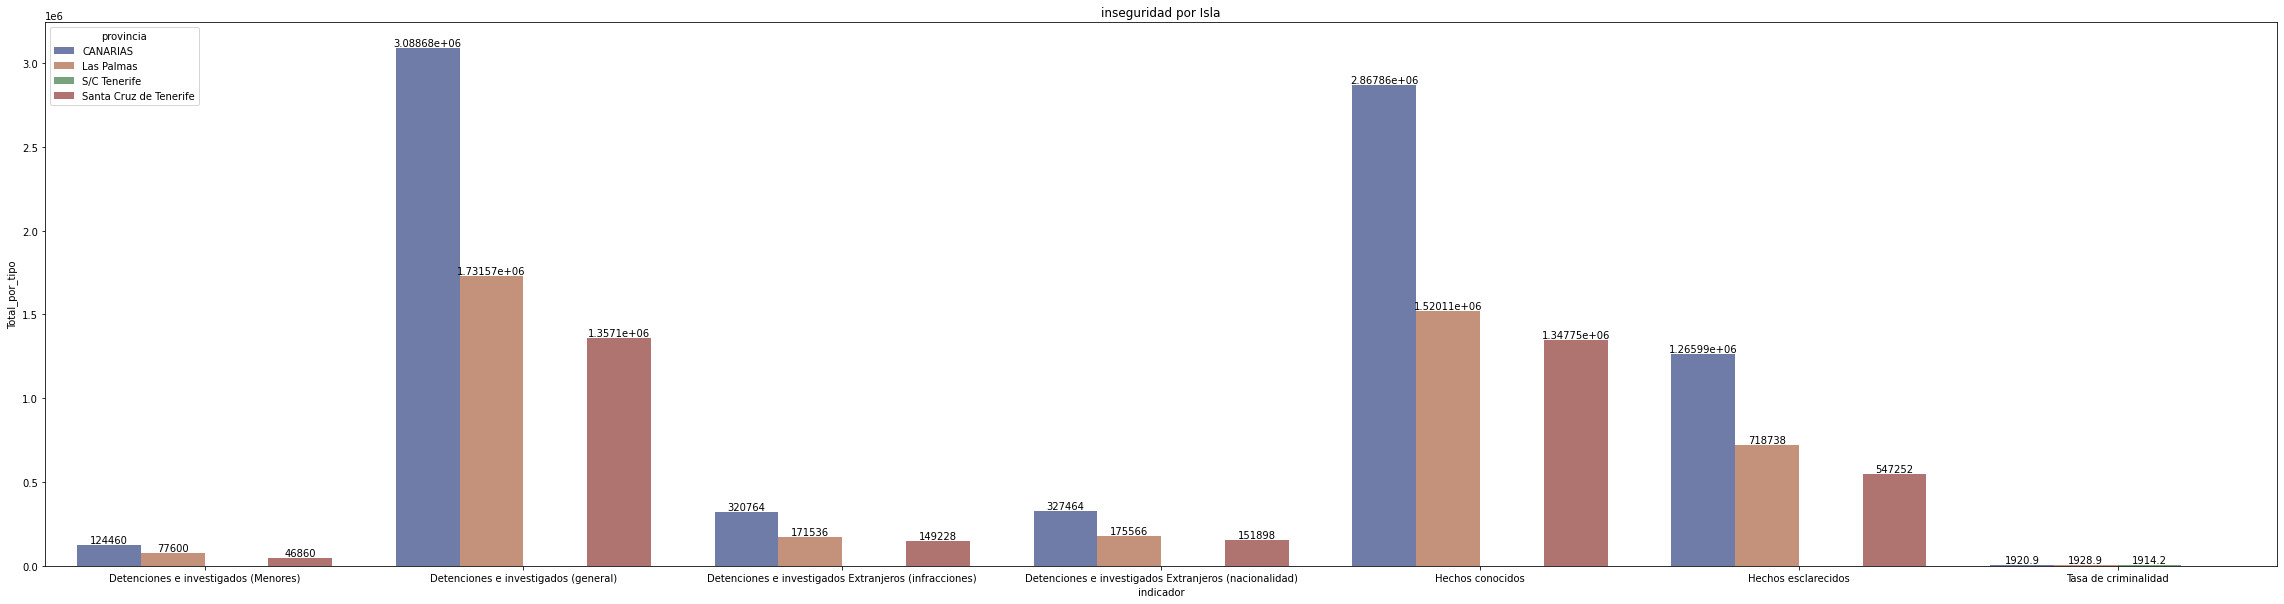

In [4]:
df = maestro_cm35_dt.groupby(['provincia','indicador']).agg(Total_por_tipo=('valor', 'sum'))
df = df.reset_index()
fig, ax = plt.subplots(figsize=(40,10))
  
ax= sb.barplot(x="indicador",
           y="Total_por_tipo",
           hue="provincia",
           data=df,ci="sd", 
           palette="dark",
           alpha=.6)
ax.set_title('inseguridad por Isla')

for container in ax.containers:
    ax.bar_label(container)


# percepcion de inseguridad segun nacionalidad

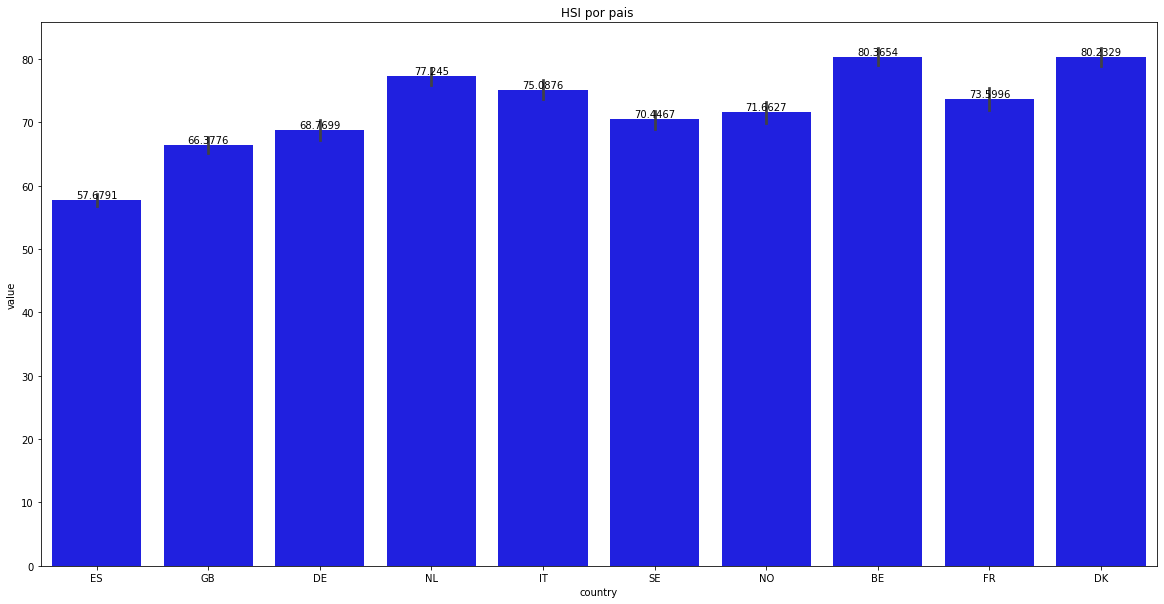

In [5]:
HSI = "../../../datos/CM01_1/HSI_2021-03-01.csv"
HSI_dt = pd.read_csv(HSI)
HSI_dt.head()
HSI_filtered = HSI_dt[HSI_dt.value != 0].sort_values(by = 'value')
fig, ax = plt.subplots(figsize=(20,10))


ax = sb.barplot(x="country", y="value",
            data=HSI_filtered,
            color="b")
ax.set_title('HSI por pais ')
for container in ax.containers:
    ax.bar_label(container)